# TASK 4: PATTERN MINING

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading the dataset

Read the .csv file containing the data. The first line contains the list of attributes. The data is assigned to a Pandas dataframe.

In [2]:
df = pd.read_csv(r"seismic_new.csv", skipinitialspace=True)

In [3]:
df.head()

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,hazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,energy,class,log_genergy,log_gpuls,log_gdenergy,log_gdpuls,log_energy
0,0.0,0.0,0,15180,48,-72,-72,0.0,0,0,0,0,0,0,0,9.627734,3.871201,3.218876,3.218876,0.000000
1,0.0,0.0,0,14720,33,-70,-79,0.0,1,0,1,0,0,2000,0,9.596962,3.496508,3.295837,2.890372,7.601402
2,0.0,0.0,0,8050,30,-81,-78,0.0,0,0,0,0,0,0,0,8.993427,3.401197,2.772589,2.944439,0.000000
3,0.0,0.0,0,28820,171,-23,40,0.0,1,0,1,0,0,3000,0,10.268825,5.141664,4.304065,4.919981,8.006701
4,0.0,0.0,0,12640,57,-63,-52,0.0,0,0,0,0,0,0,0,9.444622,4.043051,3.526361,3.806662,0.000000


In [4]:
df.shape

(2578, 20)

In [5]:
sns.set_theme(style="darkgrid")

### Remove variables

In [6]:
to_drop = ['log_genergy', 'log_gpuls', 'log_gdenergy', 'log_gdpuls', 'log_energy', 'nbumps2', 'nbumps3', 'nbumps4', 'nbumps5']
df.drop(to_drop, axis=1, inplace=True)

In [7]:
df.head()

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,hazard,nbumps,energy,class
0,0.0,0.0,0,15180,48,-72,-72,0.0,0,0,0
1,0.0,0.0,0,14720,33,-70,-79,0.0,1,2000,0
2,0.0,0.0,0,8050,30,-81,-78,0.0,0,0,0
3,0.0,0.0,0,28820,171,-23,40,0.0,1,3000,0
4,0.0,0.0,0,12640,57,-63,-52,0.0,0,0,0


### Preprocessing

In [8]:
df['genergyBin'] = pd.qcut(df['genergy'], 4)
df['gpulsBin'] = pd.qcut(df['gpuls'], 4)
df['gdenergyBin'] = pd.qcut(df['gdenergy'], 4)
df['gdpulsBin'] = pd.qcut(df['gdpuls'], 4)
df['energyBin'] = pd.qcut(df['energy'], 4, duplicates='drop')
df.drop(['genergy', 'gpuls', 'gdenergy', 'gdpuls', 'energy'], axis=1, inplace=True)

In [9]:
df.head(50)

,seismic,seismoacoustic,shift,hazard,nbumps,class,genergyBin,gpulsBin,gdenergyBin,gdpulsBin,energyBin
0,0.0,0.0,0,0.0,0,0,"(11692.5, 25500.0]","(1.999, 191.25]","(-96.001, -37.0]","(-96.001, -36.0]","(-0.001, 2675.0]"
1,0.0,0.0,0,0.0,1,0,"(11692.5, 25500.0]","(1.999, 191.25]","(-96.001, -37.0]","(-96.001, -36.0]","(-0.001, 2675.0]"
2,0.0,0.0,0,0.0,0,0,"(99.999, 11692.5]","(1.999, 191.25]","(-96.001, -37.0]","(-96.001, -36.0]","(-0.001, 2675.0]"
3,0.0,0.0,0,0.0,1,0,"(25500.0, 52757.5]","(1.999, 191.25]","(-37.0, -6.0]","(30.0, 838.0]","(2675.0, 402000.0]"
4,0.0,0.0,0,0.0,0,0,"(11692.5, 25500.0]","(1.999, 191.25]","(-96.001, -37.0]","(-96.001, -36.0]","(-0.001, 2675.0]"
5,0.0,0.0,1,0.0,0,0,"(52757.5, 2595650.0]","(191.25, 379.5]","(-96.001, -37.0]","(-96.001, -36.0]","(-0.001, 2675.0]"
6,0.0,0.0,1,0.0,2,0,"(52757.5, 2595650.0]","(379.5, 669.0]","(-37.0, -6.0]","(-6.0, 30.0]","(-0.001, 2675.0]"
7,0.0,0.0,0,0.0,1,0,"(25500.0, 52757.5]","(191.25, 379.5]","(-37.0, -6.0]","(-6.0, 30.0]","(2675.0, 402000.0]"
8,0.0,0.0,0,0.0,0,0,"(52757.5, 2595650.0]","(191.25, 379.5]","(38.0, 1245.0]","(30.0, 838.0]","(-0.001, 2675.0]"
9,0.0,0.0,1,0.0,1,0,"(52757.5, 2595650.0]","(669.0, 4518.0]","(-6.0, 38.0]","(-6.0, 30.0]","(-0.001, 2675.0]"


In [10]:
df['genergyBin'] = df['genergyBin'].astype(str) + '_genergy'
df['gpulsBin'] = df['gpulsBin'].astype(str) + '_gpuls'
df['gdenergyBin'] = df['gdenergyBin'].astype(str) + '_gdenergy'
df['gdpulsBin'] = df['gdpulsBin'].astype(str) + '_gdpuls'
df['energyBin'] = df['energyBin'].astype(str) + '_energy'

In [11]:
df.head()

,seismic,seismoacoustic,shift,hazard,nbumps,class,genergyBin,gpulsBin,gdenergyBin,gdpulsBin,energyBin
0,0.0,0.0,0,0.0,0,0,"(11692.5, 25500.0]_genergy","(1.999, 191.25]_gpuls","(-96.001, -37.0]_gdenergy","(-96.001, -36.0]_gdpuls","(-0.001, 2675.0]_energy"
1,0.0,0.0,0,0.0,1,0,"(11692.5, 25500.0]_genergy","(1.999, 191.25]_gpuls","(-96.001, -37.0]_gdenergy","(-96.001, -36.0]_gdpuls","(-0.001, 2675.0]_energy"
2,0.0,0.0,0,0.0,0,0,"(99.999, 11692.5]_genergy","(1.999, 191.25]_gpuls","(-96.001, -37.0]_gdenergy","(-96.001, -36.0]_gdpuls","(-0.001, 2675.0]_energy"
3,0.0,0.0,0,0.0,1,0,"(25500.0, 52757.5]_genergy","(1.999, 191.25]_gpuls","(-37.0, -6.0]_gdenergy","(30.0, 838.0]_gdpuls","(2675.0, 402000.0]_energy"
4,0.0,0.0,0,0.0,0,0,"(11692.5, 25500.0]_genergy","(1.999, 191.25]_gpuls","(-96.001, -37.0]_gdenergy","(-96.001, -36.0]_gdpuls","(-0.001, 2675.0]_energy"


In [12]:
sism_dict = {0: 'Lack of Hazard [a] (seismic)', 1: 'Low Hazard [b] (seismic)', 2: 'High Hazard [c] (seismic)', 3: 'Danger [d] (seismic)'}
df['seismic'] = df['seismic'].map(sism_dict)
sismaco_dict = {0: 'Lack of Hazard [a] (seismoacoustic)', 1: 'Low Hazard [b] (seismoacoustic)', 2: 'High Hazard [c] (seismoacoustic)', 3: 'Danger [d] (seismoacoustic)'}
df['seismoacoustic'] = df['seismoacoustic'].map(sismaco_dict)
hazard_dict = {0: 'Lack of Hazard [a] (hazard)', 1: 'Low Hazard [b] (hazard)', 2: 'High Hazard [c] (hazard)', 3: 'Danger [d] (hazard)'}
df['hazard'] = df['hazard'].map(hazard_dict)
shift_dict = {0: 'Preparation Shift (N)', 1: 'Coal-getting Shift (W)'}
df['shift'] = df['shift'].map(shift_dict)
class_dict = {0: 'Non-Hazardous State (0)', 1: 'Hazardous State (1)'}
df['class'] = df['class'].map(class_dict)

In [13]:
df['nbumps'] = df['nbumps'].astype(str) + '_nbumps'
#df['nbumps2'] = df['nbumps2'].astype(str) + '_nbumps2'
#df['nbumps3'] = df['nbumps3'].astype(str) + '_nbumps3'
#df['nbumps4'] = df['nbumps4'].astype(str) + '_nbumps4'
#df['nbumps5'] = df['nbumps5'].astype(str) + '_nbumps5'

In [14]:
df.head(20)

,seismic,seismoacoustic,shift,hazard,nbumps,class,genergyBin,gpulsBin,gdenergyBin,gdpulsBin,energyBin
0,Lack of Hazard [a] (seismic),Lack of Hazard [a] (seismoacoustic),Preparation Shift (N),Lack of Hazard [a] (hazard),0_nbumps,Non-Hazardous State (0),"(11692.5, 25500.0]_genergy","(1.999, 191.25]_gpuls","(-96.001, -37.0]_gdenergy","(-96.001, -36.0]_gdpuls","(-0.001, 2675.0]_energy"
1,Lack of Hazard [a] (seismic),Lack of Hazard [a] (seismoacoustic),Preparation Shift (N),Lack of Hazard [a] (hazard),1_nbumps,Non-Hazardous State (0),"(11692.5, 25500.0]_genergy","(1.999, 191.25]_gpuls","(-96.001, -37.0]_gdenergy","(-96.001, -36.0]_gdpuls","(-0.001, 2675.0]_energy"
2,Lack of Hazard [a] (seismic),Lack of Hazard [a] (seismoacoustic),Preparation Shift (N),Lack of Hazard [a] (hazard),0_nbumps,Non-Hazardous State (0),"(99.999, 11692.5]_genergy","(1.999, 191.25]_gpuls","(-96.001, -37.0]_gdenergy","(-96.001, -36.0]_gdpuls","(-0.001, 2675.0]_energy"
3,Lack of Hazard [a] (seismic),Lack of Hazard [a] (seismoacoustic),Preparation Shift (N),Lack of Hazard [a] (hazard),1_nbumps,Non-Hazardous State (0),"(25500.0, 52757.5]_genergy","(1.999, 191.25]_gpuls","(-37.0, -6.0]_gdenergy","(30.0, 838.0]_gdpuls","(2675.0, 402000.0]_energy"
4,Lack of Hazard [a] (seismic),Lack of Hazard [a] (seismoacoustic),Preparation Shift (N),Lack of Hazard [a] (hazard),0_nbumps,Non-Hazardous State (0),"(11692.5, 25500.0]_genergy","(1.999, 191.25]_gpuls","(-96.001, -37.0]_gdenergy","(-96.001, -36.0]_gdpuls","(-0.001, 2675.0]_energy"
5,Lack of Hazard [a] (seismic),Lack of Hazard [a] (seismoacoustic),Coal-getting Shift (W),Lack of Hazard [a] (hazard),0_nbumps,Non-Hazardous State (0),"(52757.5, 2595650.0]_genergy","(191.25, 379.5]_gpuls","(-96.001, -37.0]_gdenergy","(-96.001, -36.0]_gdpuls","(-0.001, 2675.0]_energy"
6,Lack of Hazard [a] (seismic),Lack of Hazard [a] (seismoacoustic),Coal-getting Shift (W),Lack of Hazard [a] (hazard),2_nbumps,Non-Hazardous State (0),"(52757.5, 2595650.0]_genergy","(379.5, 669.0]_gpuls","(-37.0, -6.0]_gdenergy","(-6.0, 30.0]_gdpuls","(-0.001, 2675.0]_energy"
7,Lack of Hazard [a] (seismic),Lack of Hazard [a] (seismoacoustic),Preparation Shift (N),Lack of Hazard [a] (hazard),1_nbumps,Non-Hazardous State (0),"(25500.0, 52757.5]_genergy","(191.25, 379.5]_gpuls","(-37.0, -6.0]_gdenergy","(-6.0, 30.0]_gdpuls","(2675.0, 402000.0]_energy"
8,Lack of Hazard [a] (seismic),Lack of Hazard [a] (seismoacoustic),Preparation Shift (N),Lack of Hazard [a] (hazard),0_nbumps,Non-Hazardous State (0),"(52757.5, 2595650.0]_genergy","(191.25, 379.5]_gpuls","(38.0, 1245.0]_gdenergy","(30.0, 838.0]_gdpuls","(-0.001, 2675.0]_energy"
9,Lack of Hazard [a] (seismic),Lack of Hazard [a] (seismoacoustic),Coal-getting Shift (W),Lack of Hazard [a] (hazard),1_nbumps,Non-Hazardous State (0),"(52757.5, 2595650.0]_genergy","(669.0, 4518.0]_gpuls","(-6.0, 38.0]_gdenergy","(-6.0, 30.0]_gdpuls","(-0.001, 2675.0]_energy"


## Frequent Itemsets

In [15]:
X = df.values.tolist()
X[0]

['Lack of Hazard [a] (seismic)',
 'Lack of Hazard [a] (seismoacoustic)',
 'Preparation Shift (N)',
 'Lack of Hazard [a] (hazard)',
 '0_nbumps',
 'Non-Hazardous State (0)',
 '(11692.5, 25500.0]_genergy',
 '(1.999, 191.25]_gpuls',
 '(-96.001, -37.0]_gdenergy',
 '(-96.001, -36.0]_gdpuls',
 '(-0.001, 2675.0]_energy']

In [16]:
from fim import apriori

In [17]:
help(apriori)

Help on built-in function apriori in module fim:

apriori(...)
    apriori (tracts, target='s', supp=10, zmin=1, zmax=None, report='a',
             eval='x', agg='x', thresh=10, prune=None, algo='b', mode='',
             border=None)
    Find frequent item sets with the Apriori algorithm.
    tracts  transaction database to mine (mandatory)
            The database must be an iterable of transactions;
            each transaction must be an iterable of items;
            each item must be a hashable object.
            If the database is a dictionary, the transactions are
            the keys, the values their (integer) multiplicities.
    target  type of frequent item sets to find     (default: s)
            s/a   sets/all   all     frequent item sets
            c     closed     closed  frequent item sets
            m     maximal    maximal frequent item sets
            g     gens       generators
            r     rules      association rules
    supp    minimum support of an i

#### TEST 1 | supp = 0.03 | zmin = 3

In [18]:
# target all
itemsets_s = apriori(X, target='s', supp=3, zmin=3, report='S')

In [19]:
itemsets_s.sort(key=lambda x: x[1], reverse=True)
len(itemsets_s)

10277

In [20]:
itemsets_s[:10]

[(('(-0.001, 2675.0]_energy',
   'Lack of Hazard [a] (hazard)',
   'Non-Hazardous State (0)'),
  64.42979053529868),
 (('Lack of Hazard [a] (seismic)',
   'Lack of Hazard [a] (hazard)',
   'Non-Hazardous State (0)'),
  57.71916214119472),
 (('Lack of Hazard [a] (seismoacoustic)',
   'Lack of Hazard [a] (hazard)',
   'Non-Hazardous State (0)'),
  56.82699767261443),
 (('0_nbumps', 'Non-Hazardous State (0)', '(-0.001, 2675.0]_energy'),
  55.00387897595035),
 (('Coal-getting Shift (W)',
   'Lack of Hazard [a] (hazard)',
   'Non-Hazardous State (0)'),
  52.13343677269201),
 (('0_nbumps', 'Lack of Hazard [a] (hazard)', '(-0.001, 2675.0]_energy'),
  50.8533747090768),
 (('0_nbumps',
   'Lack of Hazard [a] (hazard)',
   'Non-Hazardous State (0)',
   '(-0.001, 2675.0]_energy'),
  49.45694336695112),
 (('0_nbumps', 'Lack of Hazard [a] (hazard)', 'Non-Hazardous State (0)'),
  49.45694336695112),
 (('Lack of Hazard [a] (seismic)',
   '(-0.001, 2675.0]_energy',
   'Non-Hazardous State (0)'),
  49.

In [21]:
itemsets_s[0][0]

('(-0.001, 2675.0]_energy',
 'Lack of Hazard [a] (hazard)',
 'Non-Hazardous State (0)')

In [22]:
itemsets_s[0][1]

64.42979053529868

In [23]:
# target maximal
itemsets_m = apriori(X, target='m', supp=3, zmin=3, report='S')

In [24]:
itemsets_m.sort(key=lambda x: x[1], reverse=True)
len(itemsets_m)

1030

In [25]:
itemsets_m[:5]

[(('Low Hazard [b] (seismic)',
   '0_nbumps',
   'Lack of Hazard [a] (seismoacoustic)',
   'Coal-getting Shift (W)',
   '(-0.001, 2675.0]_energy',
   'Lack of Hazard [a] (hazard)',
   'Non-Hazardous State (0)'),
  6.904577191621413),
 (('(2675.0, 402000.0]_energy',
   'Lack of Hazard [a] (seismoacoustic)',
   'Coal-getting Shift (W)',
   'Lack of Hazard [a] (seismic)',
   'Lack of Hazard [a] (hazard)',
   'Non-Hazardous State (0)'),
  5.469356089992242),
 (('(11692.5, 25500.0]_genergy',
   '0_nbumps',
   'Coal-getting Shift (W)',
   'Lack of Hazard [a] (seismic)',
   '(-0.001, 2675.0]_energy',
   'Lack of Hazard [a] (hazard)',
   'Non-Hazardous State (0)'),
  5.314197051978278),
 (('Low Hazard [b] (seismoacoustic)',
   '0_nbumps',
   'Coal-getting Shift (W)',
   'Lack of Hazard [a] (seismic)',
   '(-0.001, 2675.0]_energy',
   'Lack of Hazard [a] (hazard)',
   'Non-Hazardous State (0)'),
  5.314197051978278),
 (('(-6.0, 30.0]_gdpuls',
   '0_nbumps',
   'Lack of Hazard [a] (seismoacousti

In [26]:
itemsets_m[0][0]

('Low Hazard [b] (seismic)',
 '0_nbumps',
 'Lack of Hazard [a] (seismoacoustic)',
 'Coal-getting Shift (W)',
 '(-0.001, 2675.0]_energy',
 'Lack of Hazard [a] (hazard)',
 'Non-Hazardous State (0)')

In [27]:
# target closed
itemsets_c = apriori(X, target='c', supp=3, zmin=3, report='S')

In [28]:
itemsets_c.sort(key=lambda x: x[1], reverse=True)
len(itemsets_c)

7399

In [29]:
itemsets_c[:10]

[(('(-0.001, 2675.0]_energy',
   'Lack of Hazard [a] (hazard)',
   'Non-Hazardous State (0)'),
  64.42979053529868),
 (('Lack of Hazard [a] (seismic)',
   'Lack of Hazard [a] (hazard)',
   'Non-Hazardous State (0)'),
  57.71916214119472),
 (('Lack of Hazard [a] (seismoacoustic)',
   'Lack of Hazard [a] (hazard)',
   'Non-Hazardous State (0)'),
  56.82699767261443),
 (('0_nbumps', '(-0.001, 2675.0]_energy', 'Non-Hazardous State (0)'),
  55.00387897595035),
 (('Coal-getting Shift (W)',
   'Lack of Hazard [a] (hazard)',
   'Non-Hazardous State (0)'),
  52.13343677269201),
 (('0_nbumps', '(-0.001, 2675.0]_energy', 'Lack of Hazard [a] (hazard)'),
  50.8533747090768),
 (('0_nbumps',
   '(-0.001, 2675.0]_energy',
   'Lack of Hazard [a] (hazard)',
   'Non-Hazardous State (0)'),
  49.45694336695112),
 (('Lack of Hazard [a] (seismic)',
   '(-0.001, 2675.0]_energy',
   'Non-Hazardous State (0)'),
  49.18541505042669),
 (('Lack of Hazard [a] (seismic)',
   '(-0.001, 2675.0]_energy',
   'Lack of Ha

#### TEST 2 | supp = 0.04 | zmin = 3

In [30]:
# target all
itemsets_s = apriori(X, target='s', supp=4, zmin=3, report='S')

In [31]:
itemsets_s.sort(key=lambda x: x[1], reverse=True)
len(itemsets_s)

6704

In [32]:
itemsets_s[:10]

[(('(-0.001, 2675.0]_energy',
   'Lack of Hazard [a] (hazard)',
   'Non-Hazardous State (0)'),
  64.42979053529868),
 (('Lack of Hazard [a] (seismic)',
   'Lack of Hazard [a] (hazard)',
   'Non-Hazardous State (0)'),
  57.71916214119472),
 (('Lack of Hazard [a] (seismoacoustic)',
   'Lack of Hazard [a] (hazard)',
   'Non-Hazardous State (0)'),
  56.82699767261443),
 (('0_nbumps', 'Non-Hazardous State (0)', '(-0.001, 2675.0]_energy'),
  55.00387897595035),
 (('Coal-getting Shift (W)',
   'Lack of Hazard [a] (hazard)',
   'Non-Hazardous State (0)'),
  52.13343677269201),
 (('0_nbumps', 'Lack of Hazard [a] (hazard)', '(-0.001, 2675.0]_energy'),
  50.8533747090768),
 (('0_nbumps',
   'Lack of Hazard [a] (hazard)',
   'Non-Hazardous State (0)',
   '(-0.001, 2675.0]_energy'),
  49.45694336695112),
 (('0_nbumps', 'Lack of Hazard [a] (hazard)', 'Non-Hazardous State (0)'),
  49.45694336695112),
 (('Lack of Hazard [a] (seismic)',
   '(-0.001, 2675.0]_energy',
   'Non-Hazardous State (0)'),
  49.

In [33]:
itemsets_s[0][0]

('(-0.001, 2675.0]_energy',
 'Lack of Hazard [a] (hazard)',
 'Non-Hazardous State (0)')

In [34]:
itemsets_s[0][1]

64.42979053529868

In [35]:
# target maximal
itemsets_m = apriori(X, target='m', supp=4, zmin=3, report='S')

In [36]:
itemsets_m.sort(key=lambda x: x[1], reverse=True)
len(itemsets_m)

710

In [37]:
itemsets_m[:5]

[(('0_nbumps',
   'Lack of Hazard [a] (seismoacoustic)',
   'Coal-getting Shift (W)',
   'Lack of Hazard [a] (seismic)',
   '(-0.001, 2675.0]_energy',
   'Lack of Hazard [a] (hazard)',
   'Non-Hazardous State (0)'),
  8.96043444530644),
 (('Low Hazard [b] (seismic)',
   '0_nbumps',
   'Lack of Hazard [a] (seismoacoustic)',
   'Coal-getting Shift (W)',
   '(-0.001, 2675.0]_energy',
   'Lack of Hazard [a] (hazard)',
   'Non-Hazardous State (0)'),
  6.904577191621413),
 (('(191.25, 379.5]_gpuls',
   '0_nbumps',
   'Lack of Hazard [a] (seismoacoustic)',
   'Lack of Hazard [a] (seismic)',
   '(-0.001, 2675.0]_energy',
   'Lack of Hazard [a] (hazard)',
   'Non-Hazardous State (0)'),
  6.788207913110939),
 (('(38.0, 1245.0]_gdenergy',
   '0_nbumps',
   'Lack of Hazard [a] (seismic)',
   '(-0.001, 2675.0]_energy',
   'Lack of Hazard [a] (hazard)',
   'Non-Hazardous State (0)'),
  6.47788983708301),
 (('(1.999, 191.25]_gpuls',
   '(99.999, 11692.5]_genergy',
   '(-96.001, -36.0]_gdpuls',
   'Pr

In [38]:
itemsets_m[0][0]

('0_nbumps',
 'Lack of Hazard [a] (seismoacoustic)',
 'Coal-getting Shift (W)',
 'Lack of Hazard [a] (seismic)',
 '(-0.001, 2675.0]_energy',
 'Lack of Hazard [a] (hazard)',
 'Non-Hazardous State (0)')

In [39]:
# target closed
itemsets_c = apriori(X, target='c', supp=4, zmin=3, report='S')

In [40]:
itemsets_c.sort(key=lambda x: x[1], reverse=True)
len(itemsets_c)

4819

In [41]:
itemsets_c[:10]

[(('(-0.001, 2675.0]_energy',
   'Lack of Hazard [a] (hazard)',
   'Non-Hazardous State (0)'),
  64.42979053529868),
 (('Lack of Hazard [a] (seismic)',
   'Lack of Hazard [a] (hazard)',
   'Non-Hazardous State (0)'),
  57.71916214119472),
 (('Lack of Hazard [a] (seismoacoustic)',
   'Lack of Hazard [a] (hazard)',
   'Non-Hazardous State (0)'),
  56.82699767261443),
 (('0_nbumps', '(-0.001, 2675.0]_energy', 'Non-Hazardous State (0)'),
  55.00387897595035),
 (('Coal-getting Shift (W)',
   'Lack of Hazard [a] (hazard)',
   'Non-Hazardous State (0)'),
  52.13343677269201),
 (('0_nbumps', '(-0.001, 2675.0]_energy', 'Lack of Hazard [a] (hazard)'),
  50.8533747090768),
 (('0_nbumps',
   '(-0.001, 2675.0]_energy',
   'Lack of Hazard [a] (hazard)',
   'Non-Hazardous State (0)'),
  49.45694336695112),
 (('Lack of Hazard [a] (seismic)',
   '(-0.001, 2675.0]_energy',
   'Non-Hazardous State (0)'),
  49.18541505042669),
 (('Lack of Hazard [a] (seismic)',
   '(-0.001, 2675.0]_energy',
   'Lack of Ha

#### TEST 3 | supp = 0.05 | zmin = 3

In [42]:
# target all
itemsets_s = apriori(X, target='s', supp=5, zmin=3, report='S')

In [43]:
itemsets_s.sort(key=lambda x: x[1], reverse=True)
len(itemsets_s)

4914

In [44]:
itemsets_s[:10]

[(('(-0.001, 2675.0]_energy',
   'Lack of Hazard [a] (hazard)',
   'Non-Hazardous State (0)'),
  64.42979053529868),
 (('Lack of Hazard [a] (seismic)',
   'Lack of Hazard [a] (hazard)',
   'Non-Hazardous State (0)'),
  57.71916214119472),
 (('Lack of Hazard [a] (seismoacoustic)',
   'Lack of Hazard [a] (hazard)',
   'Non-Hazardous State (0)'),
  56.82699767261443),
 (('0_nbumps', 'Non-Hazardous State (0)', '(-0.001, 2675.0]_energy'),
  55.00387897595035),
 (('Coal-getting Shift (W)',
   'Lack of Hazard [a] (hazard)',
   'Non-Hazardous State (0)'),
  52.13343677269201),
 (('0_nbumps', 'Lack of Hazard [a] (hazard)', '(-0.001, 2675.0]_energy'),
  50.8533747090768),
 (('0_nbumps',
   'Lack of Hazard [a] (hazard)',
   'Non-Hazardous State (0)',
   '(-0.001, 2675.0]_energy'),
  49.45694336695112),
 (('0_nbumps', 'Lack of Hazard [a] (hazard)', 'Non-Hazardous State (0)'),
  49.45694336695112),
 (('Lack of Hazard [a] (seismic)',
   '(-0.001, 2675.0]_energy',
   'Non-Hazardous State (0)'),
  49.

In [45]:
# target maximal
itemsets_m = apriori(X, target='m', supp=5, zmin=3, report='S')

In [46]:
itemsets_m.sort(key=lambda x: x[1], reverse=True)
len(itemsets_m)

525

In [47]:
itemsets_m[:5]

[(('0_nbumps',
   'Lack of Hazard [a] (seismoacoustic)',
   'Coal-getting Shift (W)',
   'Lack of Hazard [a] (seismic)',
   '(-0.001, 2675.0]_energy',
   'Lack of Hazard [a] (hazard)',
   'Non-Hazardous State (0)'),
  8.96043444530644),
 (('(669.0, 4518.0]_gpuls',
   '(52757.5, 2595650.0]_genergy',
   'Lack of Hazard [a] (seismoacoustic)',
   'Coal-getting Shift (W)',
   'Lack of Hazard [a] (hazard)',
   'Non-Hazardous State (0)'),
  7.95190069821567),
 (('(-36.0, -6.0]_gdpuls',
   '0_nbumps',
   'Coal-getting Shift (W)',
   '(-0.001, 2675.0]_energy',
   'Lack of Hazard [a] (hazard)',
   'Non-Hazardous State (0)'),
  7.719162141194724),
 (('(-36.0, -6.0]_gdpuls',
   'Lack of Hazard [a] (seismoacoustic)',
   'Coal-getting Shift (W)',
   '(-0.001, 2675.0]_energy',
   'Lack of Hazard [a] (hazard)',
   'Non-Hazardous State (0)'),
  7.17610550814585),
 (('(-6.0, 30.0]_gdpuls',
   '0_nbumps',
   'Coal-getting Shift (W)',
   '(-0.001, 2675.0]_energy',
   'Lack of Hazard [a] (hazard)',
   'Non

In [48]:
# target closed
itemsets_c = apriori(X, target='c', supp=5, zmin=3, report='S')

In [49]:
itemsets_c.sort(key=lambda x: x[1], reverse=True)
len(itemsets_c)

3495

In [50]:
itemsets_c[:10]

[(('(-0.001, 2675.0]_energy',
   'Lack of Hazard [a] (hazard)',
   'Non-Hazardous State (0)'),
  64.42979053529868),
 (('Lack of Hazard [a] (seismic)',
   'Lack of Hazard [a] (hazard)',
   'Non-Hazardous State (0)'),
  57.71916214119472),
 (('Lack of Hazard [a] (seismoacoustic)',
   'Lack of Hazard [a] (hazard)',
   'Non-Hazardous State (0)'),
  56.82699767261443),
 (('0_nbumps', '(-0.001, 2675.0]_energy', 'Non-Hazardous State (0)'),
  55.00387897595035),
 (('Coal-getting Shift (W)',
   'Lack of Hazard [a] (hazard)',
   'Non-Hazardous State (0)'),
  52.13343677269201),
 (('0_nbumps', '(-0.001, 2675.0]_energy', 'Lack of Hazard [a] (hazard)'),
  50.8533747090768),
 (('0_nbumps',
   '(-0.001, 2675.0]_energy',
   'Lack of Hazard [a] (hazard)',
   'Non-Hazardous State (0)'),
  49.45694336695112),
 (('Lack of Hazard [a] (seismic)',
   '(-0.001, 2675.0]_energy',
   'Non-Hazardous State (0)'),
  49.18541505042669),
 (('Lack of Hazard [a] (seismic)',
   '(-0.001, 2675.0]_energy',
   'Lack of Ha

#### TEST 4 | supp = 0.05 | zmin = 4

In [51]:
# target all
itemsets_s = apriori(X, target='s', supp=5, zmin=4, report='S')

In [52]:
itemsets_s.sort(key=lambda x: x[1], reverse=True)
len(itemsets_s)

3879

In [53]:
itemsets_s[:10]

[(('0_nbumps',
   'Lack of Hazard [a] (hazard)',
   'Non-Hazardous State (0)',
   '(-0.001, 2675.0]_energy'),
  49.45694336695112),
 (('Lack of Hazard [a] (seismic)',
   '(-0.001, 2675.0]_energy',
   'Lack of Hazard [a] (hazard)',
   'Non-Hazardous State (0)'),
  45.81070597362296),
 (('Lack of Hazard [a] (seismoacoustic)',
   '(-0.001, 2675.0]_energy',
   'Lack of Hazard [a] (hazard)',
   'Non-Hazardous State (0)'),
  43.289371605896044),
 (('Lack of Hazard [a] (seismoacoustic)',
   'Lack of Hazard [a] (seismic)',
   'Lack of Hazard [a] (hazard)',
   'Non-Hazardous State (0)'),
  39.37160589604344),
 (('0_nbumps',
   'Lack of Hazard [a] (seismic)',
   'Non-Hazardous State (0)',
   '(-0.001, 2675.0]_energy'),
  38.091543832428236),
 (('Coal-getting Shift (W)',
   '(-0.001, 2675.0]_energy',
   'Lack of Hazard [a] (hazard)',
   'Non-Hazardous State (0)'),
  36.423584173778124),
 (('0_nbumps',
   'Lack of Hazard [a] (seismic)',
   'Lack of Hazard [a] (hazard)',
   '(-0.001, 2675.0]_energy

In [54]:
# target maximal
itemsets_m = apriori(X, target='m', supp=5, zmin=4, report='S')

In [55]:
itemsets_m.sort(key=lambda x: x[1], reverse=True)
len(itemsets_m)

475

In [56]:
itemsets_m[:5]

[(('0_nbumps',
   'Lack of Hazard [a] (seismoacoustic)',
   'Coal-getting Shift (W)',
   'Lack of Hazard [a] (seismic)',
   '(-0.001, 2675.0]_energy',
   'Lack of Hazard [a] (hazard)',
   'Non-Hazardous State (0)'),
  8.96043444530644),
 (('(669.0, 4518.0]_gpuls',
   '(52757.5, 2595650.0]_genergy',
   'Lack of Hazard [a] (seismoacoustic)',
   'Coal-getting Shift (W)',
   'Lack of Hazard [a] (hazard)',
   'Non-Hazardous State (0)'),
  7.95190069821567),
 (('(-36.0, -6.0]_gdpuls',
   '0_nbumps',
   'Coal-getting Shift (W)',
   '(-0.001, 2675.0]_energy',
   'Lack of Hazard [a] (hazard)',
   'Non-Hazardous State (0)'),
  7.719162141194724),
 (('(-36.0, -6.0]_gdpuls',
   'Lack of Hazard [a] (seismoacoustic)',
   'Coal-getting Shift (W)',
   '(-0.001, 2675.0]_energy',
   'Lack of Hazard [a] (hazard)',
   'Non-Hazardous State (0)'),
  7.17610550814585),
 (('(-6.0, 30.0]_gdpuls',
   '0_nbumps',
   'Coal-getting Shift (W)',
   '(-0.001, 2675.0]_energy',
   'Lack of Hazard [a] (hazard)',
   'Non

In [57]:
# target closed
itemsets_c = apriori(X, target='c', supp=5, zmin=4, report='S')

In [58]:
itemsets_c.sort(key=lambda x: x[1], reverse=True)
len(itemsets_c)

2667

In [59]:
itemsets_c[:10]

[(('0_nbumps',
   '(-0.001, 2675.0]_energy',
   'Lack of Hazard [a] (hazard)',
   'Non-Hazardous State (0)'),
  49.45694336695112),
 (('Lack of Hazard [a] (seismic)',
   '(-0.001, 2675.0]_energy',
   'Lack of Hazard [a] (hazard)',
   'Non-Hazardous State (0)'),
  45.81070597362296),
 (('Lack of Hazard [a] (seismoacoustic)',
   '(-0.001, 2675.0]_energy',
   'Lack of Hazard [a] (hazard)',
   'Non-Hazardous State (0)'),
  43.289371605896044),
 (('Lack of Hazard [a] (seismoacoustic)',
   'Lack of Hazard [a] (seismic)',
   'Lack of Hazard [a] (hazard)',
   'Non-Hazardous State (0)'),
  39.37160589604344),
 (('0_nbumps',
   'Lack of Hazard [a] (seismic)',
   '(-0.001, 2675.0]_energy',
   'Non-Hazardous State (0)'),
  38.091543832428236),
 (('Coal-getting Shift (W)',
   '(-0.001, 2675.0]_energy',
   'Lack of Hazard [a] (hazard)',
   'Non-Hazardous State (0)'),
  36.423584173778124),
 (('0_nbumps',
   'Lack of Hazard [a] (seismic)',
   '(-0.001, 2675.0]_energy',
   'Lack of Hazard [a] (hazard)

#### Check

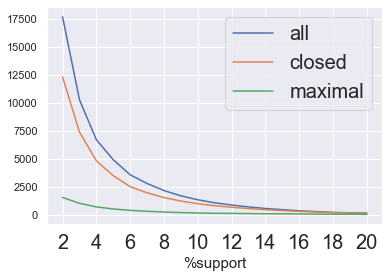

In [60]:
len_all_it = []
len_max_it = []
len_cl_it = []
for i in range(2, 20+1):
    all_itemsets = apriori(X, target='s', supp=i, zmin=3)
    max_itemsets = apriori(X, target='m', supp=i, zmin=3)
    cl_itemsets = apriori(X, target='c', supp=i, zmin=3)
    len_all_it.append( len(all_itemsets)  )
    len_max_it.append( len(max_itemsets)  )
    len_cl_it.append( len(cl_itemsets) )
    
plt.plot(len_all_it, label='all')
plt.plot(len_cl_it, label='closed')
plt.plot(len_max_it, label='maximal')
plt.legend(fontsize=20)
plt.xticks(np.arange(0, 20, 2), np.arange(2, 22, 2), fontsize=20)
plt.xlabel('%support', fontsize=15)

plt.show()

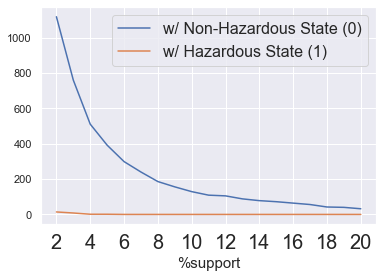

In [61]:
# MAXIMAL FREQUENT ITEMSET 

filter_1 = []
filter_2 = []
for i in range(2, 20+1):
    max_itemsets = apriori(X, target='m', supp=i, zmin=3)
    
    filter_1.append( len([item for item in max_itemsets if 'Non-Hazardous State (0)' in item[0]])  )
    filter_2.append( len([item for item in max_itemsets if 'Hazardous State (1)' in item[0]]) )
    
plt.plot(filter_1, label='w/ Non-Hazardous State (0)')
plt.plot(filter_2, label='w/ Hazardous State (1)')
plt.legend(fontsize=16)
plt.xticks(np.arange(0, 20, 2), np.arange(2, 22, 2), fontsize=20)
plt.xlabel('%support', fontsize=15)

plt.show()

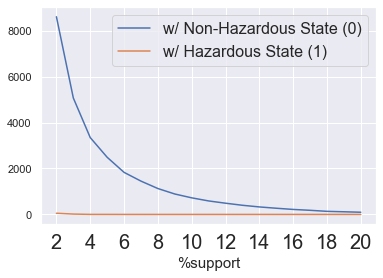

In [62]:
# ALL FREQUENT ITEMSET 

filter_1 = []
filter_2 = []
for i in range(2, 20+1):
    all_itemsets = apriori(X, target='s', supp=i, zmin=3)
    
    filter_1.append( len([item for item in all_itemsets if 'Non-Hazardous State (0)' in item[0]])  )
    filter_2.append( len([item for item in all_itemsets if 'Hazardous State (1)' in item[0]]) )
    
plt.plot(filter_1, label='w/ Non-Hazardous State (0)')
plt.plot(filter_2, label='w/ Hazardous State (1)')
plt.legend(fontsize=16)
plt.xticks(np.arange(0, 20, 2), np.arange(2, 22, 2), fontsize=20)
plt.xlabel('%support', fontsize=15)

plt.show()

## Association Rules

In [63]:
help(apriori)

Help on built-in function apriori in module fim:

apriori(...)
    apriori (tracts, target='s', supp=10, zmin=1, zmax=None, report='a',
             eval='x', agg='x', thresh=10, prune=None, algo='b', mode='',
             border=None)
    Find frequent item sets with the Apriori algorithm.
    tracts  transaction database to mine (mandatory)
            The database must be an iterable of transactions;
            each transaction must be an iterable of items;
            each item must be a hashable object.
            If the database is a dictionary, the transactions are
            the keys, the values their (integer) multiplicities.
    target  type of frequent item sets to find     (default: s)
            s/a   sets/all   all     frequent item sets
            c     closed     closed  frequent item sets
            m     maximal    maximal frequent item sets
            g     gens       generators
            r     rules      association rules
    supp    minimum support of an i

#### TEST 1 | supp=0.03 | zmin=3 | conf=60

In [102]:
rules = apriori(X, target='r', supp=3, zmin=3, conf=60, report='aScl')

In [103]:
rules.sort(key=lambda x: x[5], reverse=True)
len(rules)

39705

In [104]:
rules[:10]

[('(1.999, 191.25]_gpuls',
  ('(99.999, 11692.5]_genergy',
   '(-96.001, -36.0]_gdpuls',
   'Preparation Shift (N)',
   'Lack of Hazard [a] (seismic)',
   'Lack of Hazard [a] (hazard)'),
  235,
  9.115593483320403,
  0.9957627118644068,
  3.9799632111417687),
 ('(1.999, 191.25]_gpuls',
  ('(99.999, 11692.5]_genergy',
   '(-96.001, -36.0]_gdpuls',
   'Preparation Shift (N)',
   'Lack of Hazard [a] (seismic)'),
  235,
  9.115593483320403,
  0.9957627118644068,
  3.9799632111417687),
 ('(1.999, 191.25]_gpuls',
  ('(99.999, 11692.5]_genergy',
   '(-96.001, -36.0]_gdpuls',
   'Preparation Shift (N)',
   'Lack of Hazard [a] (seismic)',
   'Lack of Hazard [a] (hazard)',
   'Non-Hazardous State (0)'),
  233,
  9.038013964313421,
  0.9957264957264957,
  3.9798184588882264),
 ('(1.999, 191.25]_gpuls',
  ('(99.999, 11692.5]_genergy',
   '(-96.001, -36.0]_gdpuls',
   'Preparation Shift (N)',
   'Lack of Hazard [a] (seismic)',
   'Non-Hazardous State (0)'),
  233,
  9.038013964313421,
  0.995726495

In [105]:
print(rules[0][1], "-->", rules[0][0])

('(99.999, 11692.5]_genergy', '(-96.001, -36.0]_gdpuls', 'Preparation Shift (N)', 'Lack of Hazard [a] (seismic)', 'Lack of Hazard [a] (hazard)') --> (1.999, 191.25]_gpuls


In [106]:
# support count
rules[0][2]

235

In [107]:
# support 
rules[0][3]

9.115593483320403

In [108]:
# confidence
rules[0][4]

0.9957627118644068

In [109]:
# lift
rules[0][5]

3.9799632111417687

In [110]:
# r[1] implies r[0], r[2]: support, r[3]: % support, r[4]: confidence, r[5]: lift

for r in rules:
    if r[0] == 'Hazardous State (1)':
        print(r)

In [123]:

for r in rules:
    if r[0] == 'Non-Hazardous State (0)':
        print(r)




('Non-Hazardous State (0)', ('1_nbumps', '(25500.0, 52757.5]_genergy', '(2675.0, 402000.0]_energy'), 79, 3.064391000775795, 1.0, 1.0705980066445182)
('Non-Hazardous State (0)', ('1_nbumps', '(379.5, 669.0]_gpuls', 'Lack of Hazard [a] (seismic)'), 80, 3.1031807602792862, 1.0, 1.0705980066445182)
('Non-Hazardous State (0)', ('(-36.0, -6.0]_gdpuls', '(99.999, 11692.5]_genergy', 'Preparation Shift (N)', '0_nbumps', 'Lack of Hazard [a] (seismic)', '(-0.001, 2675.0]_energy', 'Lack of Hazard [a] (hazard)'), 88, 3.4134988363072147, 1.0, 1.0705980066445182)
('Non-Hazardous State (0)', ('(-36.0, -6.0]_gdpuls', '(99.999, 11692.5]_genergy', 'Preparation Shift (N)', '0_nbumps', 'Lack of Hazard [a] (seismic)', '(-0.001, 2675.0]_energy'), 89, 3.4522885958107064, 1.0, 1.0705980066445182)
('Non-Hazardous State (0)', ('(-36.0, -6.0]_gdpuls', '(99.999, 11692.5]_genergy', 'Preparation Shift (N)', '0_nbumps', 'Lack of Hazard [a] (seismic)', 'Lack of Hazard [a] (hazard)'), 88, 3.4134988363072147, 1.0, 1.070

('Non-Hazardous State (0)', ('(1.999, 191.25]_gpuls', '(-96.001, -36.0]_gdpuls', 'Lack of Hazard [a] (seismoacoustic)', 'Lack of Hazard [a] (seismic)', 'Lack of Hazard [a] (hazard)'), 275, 10.667183863460046, 0.9786476868327402, 1.0477382627304004)
('Non-Hazardous State (0)', ('(1.999, 191.25]_gpuls', '(-96.001, -36.0]_gdpuls', 'Lack of Hazard [a] (seismoacoustic)', 'Lack of Hazard [a] (seismic)'), 275, 10.667183863460046, 0.9786476868327402, 1.0477382627304004)
('Non-Hazardous State (0)', ('0_nbumps', 'Lack of Hazard [a] (seismic)', '(-0.001, 2675.0]_energy', 'Lack of Hazard [a] (hazard)'), 916, 35.53141970519783, 0.9786324786324786, 1.0477219808615157)
('Non-Hazardous State (0)', ('0_nbumps', 'Lack of Hazard [a] (seismic)', 'Lack of Hazard [a] (hazard)'), 916, 35.53141970519783, 0.9786324786324786, 1.0477219808615157)
('Non-Hazardous State (0)', ('(-96.001, -36.0]_gdpuls', 'Low Hazard [b] (seismoacoustic)', '(-0.001, 2675.0]_energy'), 137, 5.314197051978278, 0.9785714285714285, 1.047

('Non-Hazardous State (0)', ('(30.0, 838.0]_gdpuls', '0_nbumps', '(-0.001, 2675.0]_energy'), 314, 12.179984484096199, 0.9602446483180428, 1.028036006380363)
('Non-Hazardous State (0)', ('(30.0, 838.0]_gdpuls', '0_nbumps'), 314, 12.179984484096199, 0.9602446483180428, 1.028036006380363)
('Non-Hazardous State (0)', ('(1.999, 191.25]_gpuls', '(-96.001, -37.0]_gdenergy', 'Lack of Hazard [a] (hazard)'), 314, 12.179984484096199, 0.9602446483180428, 1.028036006380363)
('Non-Hazardous State (0)', ('(11692.5, 25500.0]_genergy', 'Low Hazard [b] (seismic)', 'Coal-getting Shift (W)', '(-0.001, 2675.0]_energy'), 169, 6.555469356089992, 0.9602272727272727, 1.0280174041075203)
('Non-Hazardous State (0)', ('(11692.5, 25500.0]_genergy', 'Lack of Hazard [a] (seismoacoustic)', 'Lack of Hazard [a] (seismic)', '(-0.001, 2675.0]_energy', 'Lack of Hazard [a] (hazard)'), 169, 6.555469356089992, 0.9602272727272727, 1.0280174041075203)
('Non-Hazardous State (0)', ('(-36.0, -6.0]_gdpuls', 'Lack of Hazard [a] (se

('Non-Hazardous State (0)', ('(11692.5, 25500.0]_genergy', '(-96.001, -37.0]_gdenergy', 'Lack of Hazard [a] (seismic)'), 110, 4.266873545384018, 0.9243697478991597, 0.9896284095033362)
('Non-Hazardous State (0)', ('(25500.0, 52757.5]_genergy', '(379.5, 669.0]_gpuls', 'Coal-getting Shift (W)', '(-0.001, 2675.0]_energy'), 207, 8.029480217222654, 0.9241071428571429, 0.9893472650688182)
('Non-Hazardous State (0)', ('(2675.0, 402000.0]_energy', 'Lack of Hazard [a] (seismoacoustic)', 'Lack of Hazard [a] (seismic)', 'Lack of Hazard [a] (hazard)'), 207, 8.029480217222654, 0.9241071428571429, 0.9893472650688182)
('Non-Hazardous State (0)', ('(2675.0, 402000.0]_energy', 'Lack of Hazard [a] (seismoacoustic)', 'Lack of Hazard [a] (seismic)'), 207, 8.029480217222654, 0.9241071428571429, 0.9893472650688182)
('Non-Hazardous State (0)', ('1_nbumps', '(30.0, 838.0]_gdpuls', 'Lack of Hazard [a] (seismoacoustic)'), 73, 2.8316524437548485, 0.9240506329113924, 0.9892867656335422)
('Non-Hazardous State (0)'

In [112]:
len_r = []
for i in range(1, 20+1): #support
    len_r_wrt_i = []
    for j in range(60, 100+1): #confidence
        rules_check = apriori(X, target='r', supp=i, zmin=3, conf=j, report='aScl')
        
        len_r_wrt_i.append(len(rules_check)) # study your characteristics/properties here
        
    len_r.append(len_r_wrt_i)

In [113]:
len_r[3]

[27122,
 26391,
 25751,
 25112,
 24525,
 23906,
 23273,
 22625,
 22023,
 21376,
 20766,
 20194,
 19551,
 18924,
 18309,
 17756,
 17031,
 16395,
 15721,
 15177,
 14686,
 14183,
 13645,
 13019,
 12415,
 11807,
 11215,
 10503,
 9839,
 9206,
 8679,
 8055,
 7470,
 6950,
 6385,
 5707,
 5083,
 4472,
 3822,
 3057,
 2107]

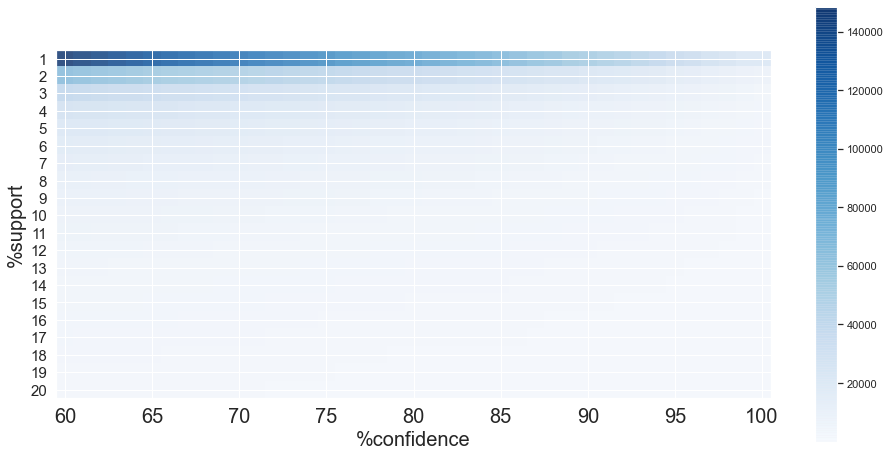

In [114]:
plt.subplots(figsize=(16, 8))
plt.imshow( len_r, cmap='Blues', alpha=0.8 )
plt.xlabel('%confidence', fontsize=20)
plt.ylabel('%support', fontsize=20)
plt.xticks(np.arange(0,40+1,5), np.arange(60,100+1,5), fontsize=20)
plt.yticks(np.arange(0,20,1), np.arange(1,20+1,1), fontsize=15  )
plt.colorbar()

plt.show()

In [115]:
list_rules = pd.Series(len_r[3])
df_rules = pd.DataFrame(list_rules).reset_index()
df_rules.columns = ['confidence', 'rules']

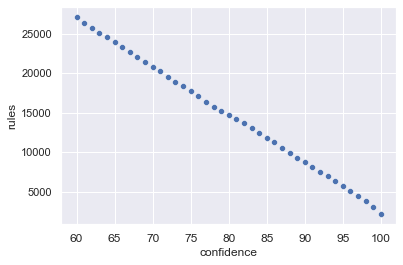

In [116]:
sns.scatterplot(data=df_rules,  x="confidence", y="rules")
plt.xticks(np.arange(0,40+1,5), np.arange(60,100+1,5), fontsize=12)
plt.show()

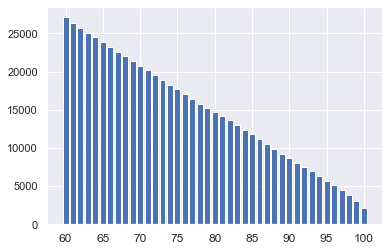

In [117]:
plt.bar(df_rules['confidence'], df_rules['rules'])
plt.xticks(np.arange(0,40+1,5), np.arange(60,100+1,5), fontsize=12)
plt.show()

ESTRAZIONE DI REGOLE CON HAZARODUS STATE = 1

In [136]:
rules = apriori(X, target='r', supp=3, zmin=3, conf=30, report='aScl')

In [137]:
rules.sort(key=lambda x: x[5], reverse=True)
len(rules)

86453

In [138]:
for r in rules:
    if r[0] == 'Hazardous State (1)':
        print(r)

('Hazardous State (1)', ('(-36.0, -6.0]_gdpuls', '(669.0, 4518.0]_gpuls', '(52757.5, 2595650.0]_genergy', 'Lack of Hazard [a] (seismoacoustic)', 'Coal-getting Shift (W)', 'Lack of Hazard [a] (hazard)'), 24, 0.9309542280837859, 0.3076923076923077, 4.66606334841629)
('Hazardous State (1)', ('(-36.0, -6.0]_gdpuls', '(669.0, 4518.0]_gpuls', '(52757.5, 2595650.0]_genergy', 'Lack of Hazard [a] (seismoacoustic)', 'Coal-getting Shift (W)'), 24, 0.9309542280837859, 0.3076923076923077, 4.66606334841629)
('Hazardous State (1)', ('(-36.0, -6.0]_gdpuls', '(669.0, 4518.0]_gpuls', '(52757.5, 2595650.0]_genergy', 'Lack of Hazard [a] (seismoacoustic)', 'Lack of Hazard [a] (hazard)'), 24, 0.9309542280837859, 0.3037974683544304, 4.606999255398362)
('Hazardous State (1)', ('(-36.0, -6.0]_gdpuls', '(669.0, 4518.0]_gpuls', '(52757.5, 2595650.0]_genergy', 'Lack of Hazard [a] (seismoacoustic)'), 24, 0.9309542280837859, 0.3037974683544304, 4.606999255398362)


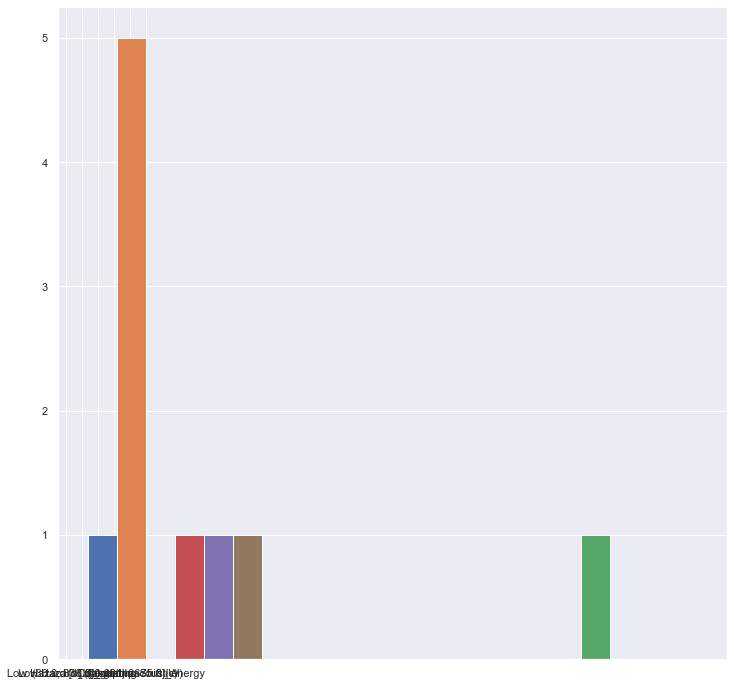

In [149]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.hist(rules[3],bins=3)
plt.show()